In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Uploading files and creating a 360-degree view of the data

In [76]:
claim = pd.read_csv("E://JN//Python Foundation Case Study 3 - Insurance Claims Case Study//Case Study 3 - Insurance Claims Case Study//claims.csv")
cus =pd.read_csv("E://JN//Python Foundation Case Study 3 - Insurance Claims Case Study//Case Study 3 - Insurance Claims Case Study//cust_demographics.csv")

In [77]:
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [78]:
cus

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [79]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [80]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [81]:
#merging both data claim and cust_demographics as merge_data
merge_data =pd.merge(cus,claim,left_on="CUST_ID",right_on="customer_id",how="inner")

In [82]:
merge_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [83]:
#droping customer_id
merge_data.drop(columns="customer_id",inplace=True)

In [84]:
merge_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


## Data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.¶

In [86]:
merge_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [87]:
#makind DOB and Claim_date into date time formate
merge_data.DateOfBirth=pd.to_datetime(merge_data.DateOfBirth,format='%d-%b-%y')
merge_data.claim_date=pd.to_datetime(merge_data.claim_date,format='%m/%d/%Y')

In [88]:
merge_data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [89]:
merge_data.DateOfBirth=np.where(merge_data.DateOfBirth.dt.year>=2000,merge_data.DateOfBirth-pd.DateOffset(years=100),merge_data.DateOfBirth)

In [90]:
merge_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,$2840,4.0,No


In [91]:
merge_data['Contact'] = merge_data['Contact'].astype(str).str.replace('-', '', regex=False).astype(float)

In [92]:
merge_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No


In [93]:
merge_data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [94]:
merge_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,$2840,4.0,No


## Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [96]:
merge_data['claim_amount'] = merge_data['claim_amount'].replace('[\$,]', '', regex=True).astype(float)

In [97]:
merge_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


## 4. Injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [99]:
merge_data['flag'] = np.where(merge_data.police_report.isin(['No','Unknown']), 0, 1)

In [100]:
merge_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


## 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. 

In [102]:
#sorting in the base if claim_date
merge_data = merge_data.sort_values('claim_date', ascending=False)
merge_data.reset_index(drop=True, inplace=True)

In [103]:
merge_data.drop_duplicates(subset="CUST_ID",inplace=True)

In [104]:
merge_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
2,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
3,46710738,Male,1977-04-28,MO,9.628349e+09,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,77219712,Female,1999-08-05,NH,6.495929e+09,Platinum,61374372,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0
1081,42664554,Female,1993-08-13,TN,3.969733e+09,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0
1082,64840478,Female,1974-02-14,NM,9.181747e+09,Silver,23636125,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0
1083,74155265,Male,1985-11-16,TX,3.927395e+09,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0


## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [106]:
merge_data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
flag                    0
dtype: int64

In [107]:
merge_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
2,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
3,46710738,Male,1977-04-28,MO,9.628349e+09,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,77219712,Female,1999-08-05,NH,6.495929e+09,Platinum,61374372,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0
1081,42664554,Female,1993-08-13,TN,3.969733e+09,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0
1082,64840478,Female,1974-02-14,NM,9.181747e+09,Silver,23636125,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0
1083,74155265,Male,1985-11-16,TX,3.927395e+09,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0


In [137]:
catagorical_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
continious_col = ["claim_amount"]

In [143]:
for col in catagorical_col:
    merge_data[col] = merge_data[col].fillna(merge_data[col].mode()[0])
merge_data[continious_col] = merge_data[continious_col].fillna(merge_data[continious_col].mean())
merge_data.head()


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0
2,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0
3,46710738,Male,1977-04-28,MO,9.628349e+09,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,0


In [147]:
merge_data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
flag                    0
dtype: int64

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

In [150]:
merge_data['age']=pd.Timestamp.now().year-merge_data.DateOfBirth.dt.year

In [162]:
# Making column age group Children <18 Youth 18-30, Adult 30-60,Senior > 60
merge_data['AgeGroup']=np.where(merge_data.age<18,'Children',np.where(merge_data.age<=30,'Youth',np.where(merge_data.age<=60,'Adult','Senior')))

In [158]:
merge_data.head(50)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,AgeGroup
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,58,Adult
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0,49,Adult
2,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,57,Adult
3,46710738,Male,1977-04-28,MO,9.628349e+09,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,Adult
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,0,39,Adult
5,17682060,Female,1974-11-21,NV,1.861953e+09,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.000000,1.0,No,0,51,Adult
6,40480522,Female,1984-05-30,NV,7.392597e+09,Gold,52377605,Driver error,2018-10-30,Auto,Unknown,Material and injury,26310.000000,1.0,No,0,41,Adult
7,28932340,Male,1996-01-05,LA,6.522658e+09,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,1.0,No,0,29,Youth
8,65208809,Male,1964-04-22,VA,2.861286e+09,Platinum,91386759,Natural causes,2018-10-30,Auto,No,Material only,2290.000000,1.0,No,0,61,Senior
9,86491727,Female,1997-01-29,IL,2.941873e+09,Gold,32178193,Driver error,2018-10-30,Home,Unknown,Material only,1860.000000,1.0,No,0,28,Youth


In [160]:
merge_data.groupby(by = "AgeGroup").count()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age
AgeGroup,,,,,,,,,,,,,,,,,
Adult,805,805,805,805,805,805,805,805,805,805,805,805,805,798,805,805,805
Senior,132,132,132,132,132,132,132,132,132,132,132,132,132,131,132,132,132
Youth,141,141,141,141,141,141,141,141,141,141,141,141,141,139,141,141,141


## 8. What is the average amount claimed by the customers from various segments?

In [199]:
merge_data.groupby(by="Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12846.400227
Platinum,12371.654843
Silver,12267.859374


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [202]:
merge_data.loc[merge_data.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                 7.219386e+05
total_Driver error          3.315851e+06
total_Natural causes        1.312987e+06
total_Other causes          3.723152e+06
total_Other driver error    3.277536e+06
Name: claim_amount, dtype: float64

## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes

In [207]:
merge_data[(merge_data.age>17) & merge_data.State.isin(['TX','DE','AK']) & merge_data.incident_cause.isin(['Driver error','Other driver error'])].CUST_ID.count()

35

In [209]:
merge_data.loc[(merge_data.incident_cause.str.lower().str.contains("driver") 
    & ((merge_data.State == "TX") | (merge_data.State == "DE") | (merge_data.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [212]:
gender_segment = merge_data.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()

In [214]:
gender_segment

,gender,Segment,claim_amount
0,Female,Gold,2.110045e+06
1,Female,Platinum,2.369722e+06
2,Female,Silver,1.897545e+06
3,Male,Gold,2.655970e+06
4,Male,Platinum,2.096445e+06
5,Male,Silver,2.347134e+06


In [216]:
gender_segment = gender_segment.pivot(index = "Segment", columns = "gender", values = "claim_amount")

In [218]:
gender_segment

gender,Female,Male
Segment,,
Gold,2.110045e+06,2.655970e+06
Platinum,2.369722e+06,2.096445e+06
Silver,1.897545e+06,2.347134e+06


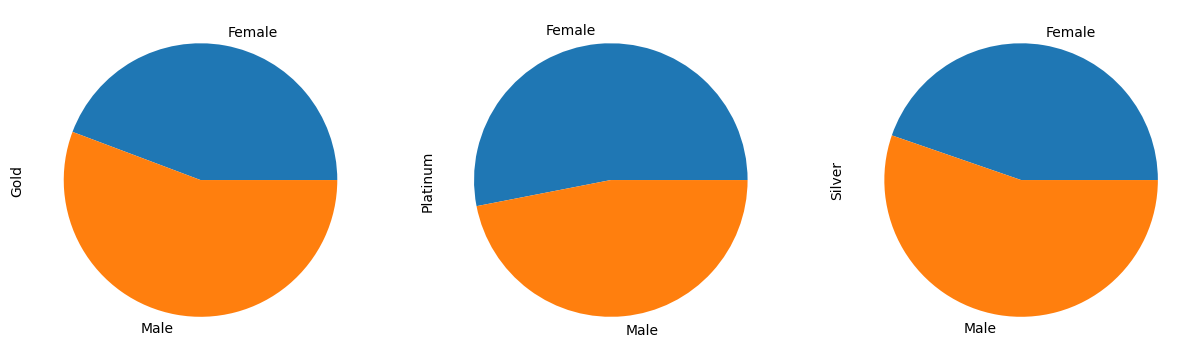

In [224]:
gender_segment.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

## 12.Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

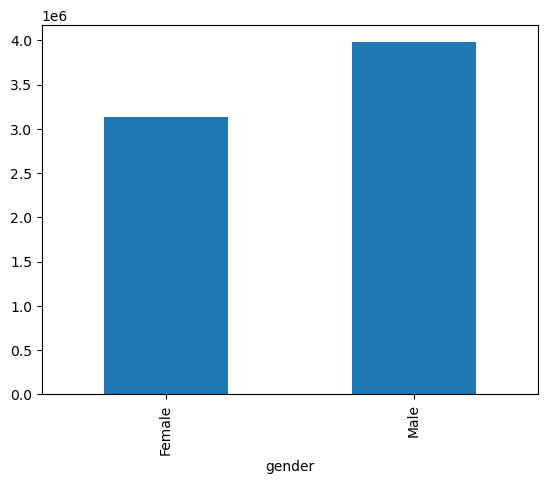

In [228]:
merge_data[merge_data.incident_cause.isin(['Driver error','Other driver error'])].groupby('gender').claim_amount.sum().plot(kind='bar')
plt.show()

In [237]:
merge_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,AgeGroup
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,58,Adult
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0,49,Adult
2,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,57,Adult
3,46710738,Male,1977-04-28,MO,9.628349e+09,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,Adult
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,0,39,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,77219712,Female,1999-08-05,NH,6.495929e+09,Platinum,61374372,Other causes,2017-01-01,Auto,No,Material and injury,20200.000000,1.0,No,0,26,Youth
1081,42664554,Female,1993-08-13,TN,3.969733e+09,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,0,32,Adult
1082,64840478,Female,1974-02-14,NM,9.181747e+09,Silver,23636125,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,0,51,Adult
1083,74155265,Male,1985-11-16,TX,3.927395e+09,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,0,40,Adult


## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [239]:
merge_data[merge_data.fraudulent=='Yes'].groupby('AgeGroup').fraudulent.count()

AgeGroup
Adult     185
Senior     35
Youth      25
Name: fraudulent, dtype: int64

In [243]:
# making a column age group fraud
age_grp_fraud = merge_data[merge_data.fraudulent=='Yes'].groupby('AgeGroup').fraudulent.count().reset_index()

In [245]:
age_grp_fraud

,AgeGroup,fraudulent
0,Adult,185
1,Senior,35
2,Youth,25


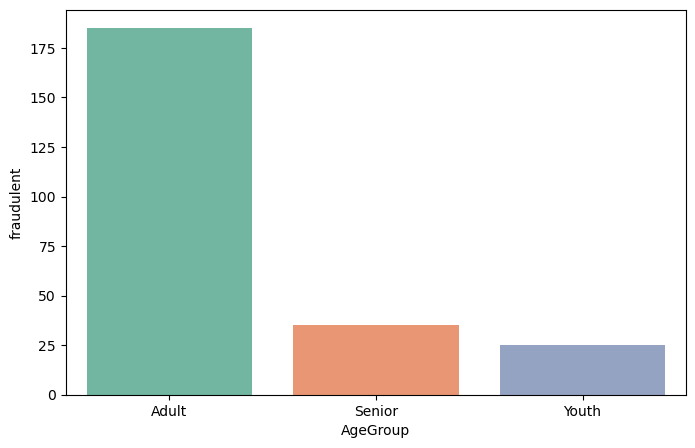

In [265]:
colors = sns.color_palette('Set2', n_colors=len(age_grp_fraud))
plt.figure(figsize=(8,5))
sns.barplot(x = "AgeGroup", y = "fraudulent", data = age_grp_fraud,palette=colors)
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers.Ensure that on the "month" axis, the month is in a chronological order not alphabetical orde

In [268]:
merge_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,AgeGroup
0,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,58,Adult
1,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0,49,Adult
2,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,57,Adult
3,46710738,Male,1977-04-28,MO,9.628349e+09,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,Adult
4,77510822,Female,1986-03-18,AK,4.369347e+09,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,0,39,Adult


In [272]:
# making a new column called monthy trend to visualize .
monthly_trend = merge_data.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()

In [274]:
monthly_trend['Monthly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
monthly_trend['Yearly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [276]:
monthly_trend_data = monthly_trend.groupby(["Monthly"])[["claim_amount"]].sum().reset_index()

In [278]:
monthly_trend_data

,Monthly,claim_amount
0,April,1.292514e+06
1,August,9.112972e+05
2,December,6.942527e+05
3,February,1.164542e+06
4,January,1.327171e+06
5,July,1.379316e+06
6,June,1.279030e+06
7,March,1.320250e+06
8,May,1.114461e+06
9,November,6.011875e+05


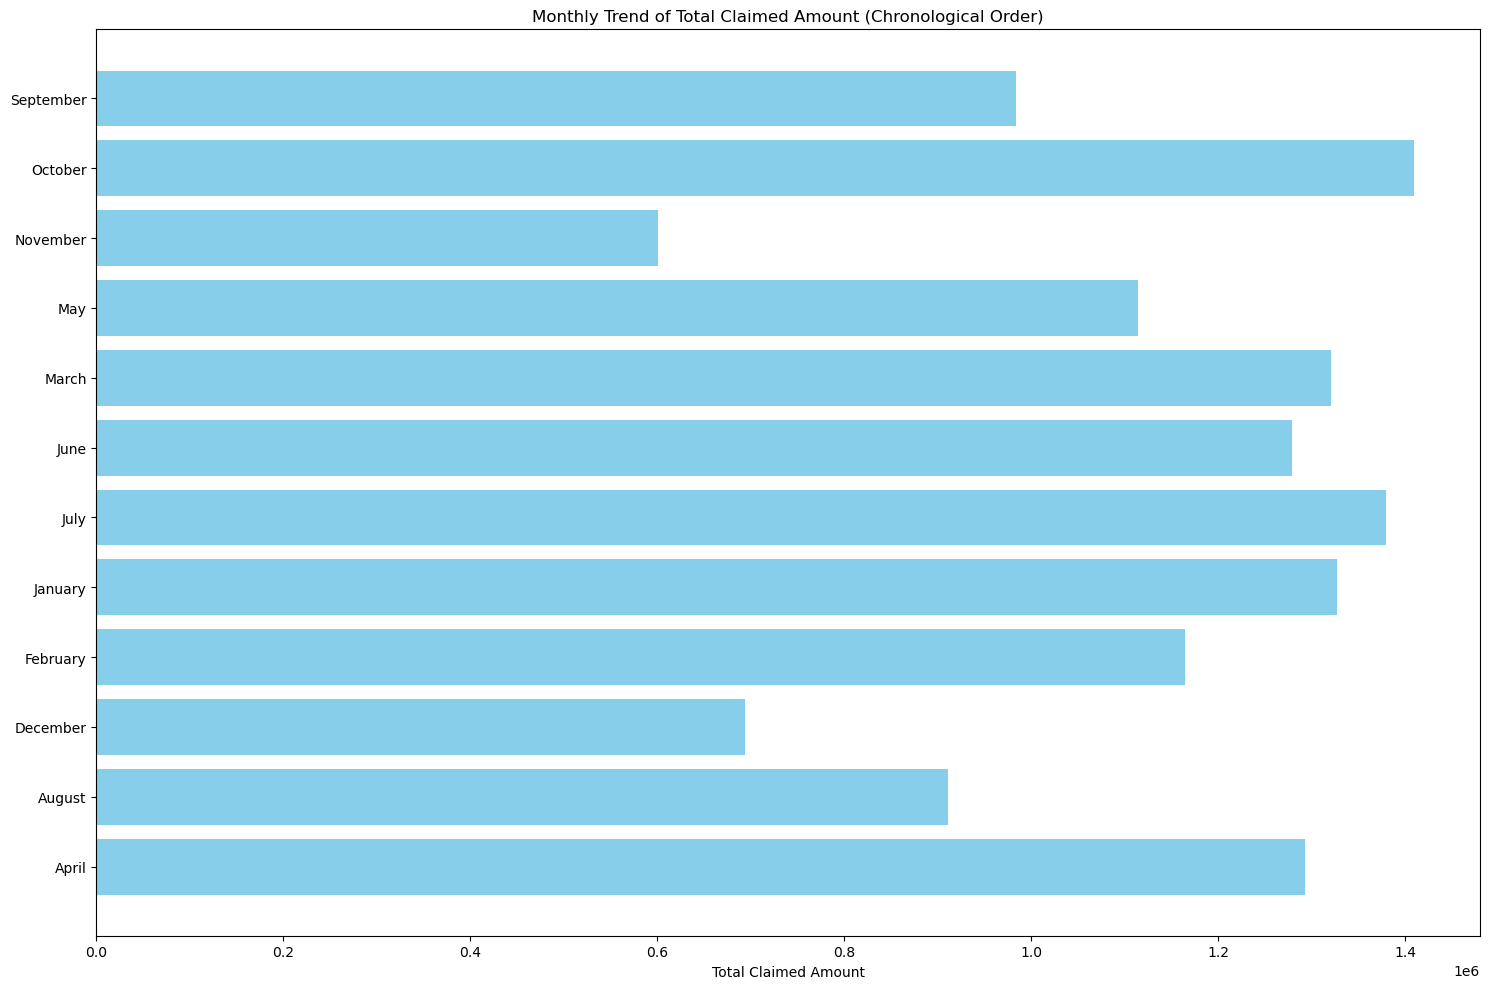

In [304]:
plt.figure(figsize=(15, 10))
plt.barh(monthly_trend_data['Monthly'], monthly_trend_data['claim_amount'], color='skyblue')
plt.xlabel('Total Claimed Amount')
plt.title('Monthly Trend of Total Claimed Amount (Chronological Order)')
plt.tight_layout()
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [313]:
avg_claim=merge_data.groupby(['fraudulent', 'gender', 'AgeGroup'])['claim_amount'].mean().reset_index()

In [315]:
avg_claim

,fraudulent,gender,AgeGroup,claim_amount
0,No,Female,Adult,12709.731762
1,No,Female,Senior,11588.871803
2,No,Female,Youth,11374.347377
3,No,Male,Adult,12221.911900
4,No,Male,Senior,11569.121757
5,No,Male,Youth,13596.143880
6,Yes,Female,Adult,12916.548454
7,Yes,Female,Senior,4860.840909
8,Yes,Female,Youth,9684.818079
9,Yes,Male,Adult,15383.123535


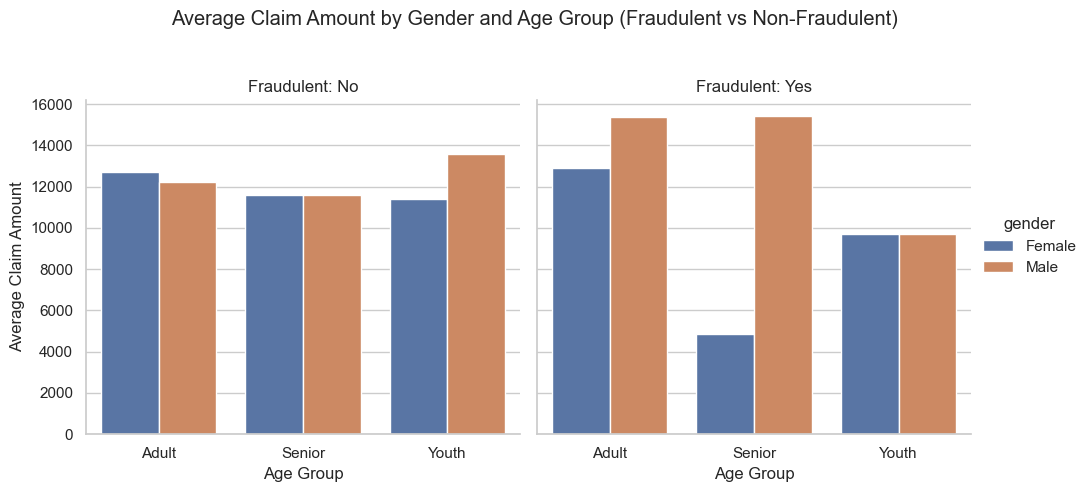

In [319]:
sns.set(style="whitegrid")
g = sns.catplot(
    data=avg_claim,
    x='AgeGroup',
    y='claim_amount',
    hue='gender',
    col='fraudulent',
    kind='bar',
    height=5,
    aspect=1
)

g.set_titles("Fraudulent: {col_name}")
g.set_axis_labels("Age Group", "Average Claim Amount")
g._legend.set_title("gender")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Average Claim Amount by Gender and Age Group (Fraudulent vs Non-Fraudulent)")
plt.show()

## 16. Is there any similarity in the amount claimed by males and females?

In [322]:
merge_data.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'flag', 'age', 'AgeGroup'],
      dtype='object')

In [330]:
merge_gender = merge_data.groupby(["gender","claim_date"])[["claim_amount"]].sum().reset_index()

In [332]:
merge_gender

,gender,claim_date,claim_amount
0,Female,2017-01-01,119620.000000
1,Female,2017-01-07,4576.500000
2,Female,2017-01-14,85203.000000
3,Female,2017-01-21,23410.726555
4,Female,2017-01-27,6507.500000
...,...,...,...
194,Male,2018-10-03,85362.226555
195,Male,2018-10-09,145030.000000
196,Male,2018-10-16,21610.000000
197,Male,2018-10-23,83441.726555


In [334]:
# making new columns "Month" and "Year"
merge_gender['Monthly'] = merge_gender['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
merge_gender['Yearly'] = merge_gender['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [336]:
merge_gender.head()

,gender,claim_date,claim_amount,Monthly,Yearly
0,Female,2017-01-01,119620.000000,January,2017
1,Female,2017-01-07,4576.500000,January,2017
2,Female,2017-01-14,85203.000000,January,2017
3,Female,2017-01-21,23410.726555,January,2017
4,Female,2017-01-27,6507.500000,January,2017


In [338]:
Claim_amt = 'claim_amount'

male_spend = merge_gender.loc[ merge_gender.gender == "Male", Claim_amt ]
female_spend = merge_gender.loc[ merge_gender.gender == "Female", Claim_amt ]

print( 'mean of male spend: ', male_spend.mean(), '| mean of female spend: ', female_spend.mean() )

mean of male spend:  71712.6227875996 | mean of female spend:  63773.11570088845


In [340]:
stats.ttest_ind( male_spend, female_spend )

TtestResult(statistic=1.387565480887983, pvalue=0.16683694863507187, df=197.0)

In [342]:
stats.f_oneway( male_spend, female_spend )

F_onewayResult(statistic=1.9253379637518948, pvalue=0.16683694863507317)

In [346]:
print ("Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship for the amount claimed by males and females" )

Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship for the amount claimed by males and females


## 17. Is there any relationship between age category and segment?

In [353]:
relationship=pd.crosstab(merge_data['AgeGroup'], merge_data['Segment'])

In [355]:
relationship

Segment,Gold,Platinum,Silver
AgeGroup,,,
Adult,278,270,257
Senior,45,47,40
Youth,48,44,49


In [357]:
stats.chi2_contingency( relationship )

Chi2ContingencyResult(statistic=0.8591966330667935, pvalue=0.9303403339916205, dof=4, expected_freq=array([[277.04545455, 269.57792208, 258.37662338],
       [ 45.42857143,  44.20408163,  42.36734694],
       [ 48.52597403,  47.21799629,  45.25602968]]))

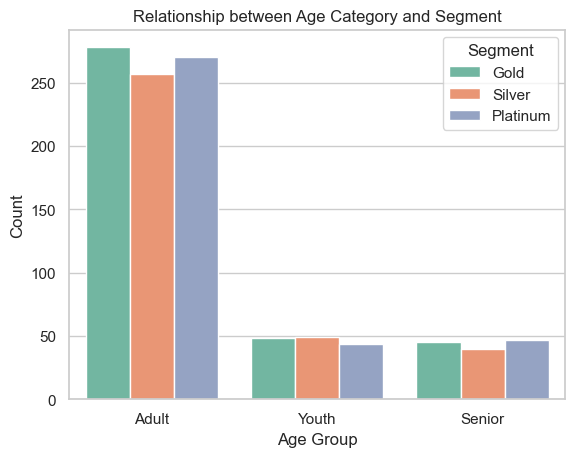

In [363]:
sns.countplot(data=merge_data, x='AgeGroup', hue='Segment', palette='Set2')
plt.title('Relationship between Age Category and Segment')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Segment')
plt.show()

##  18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [366]:
merge_new  =merge_data.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()

In [368]:
merge_new['Monthly'] = merge_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
merge_new['Yearly'] = merge_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [372]:
merge_new

,claim_date,claim_amount,Monthly,Yearly
0,2017-01-01,203227.000000,January,2017
1,2017-01-07,135383.500000,January,2017
2,2017-01-14,138807.500000,January,2017
3,2017-01-21,72638.953110,January,2017
4,2017-01-27,57959.226555,January,2017
...,...,...,...,...
95,2018-10-03,187868.726555,October,2018
96,2018-10-09,225007.500000,October,2018
97,2018-10-16,119829.000000,October,2018
98,2018-10-23,147146.453110,October,2018


In [384]:
merge_new_2017 = merge_new.loc[merge_new.Yearly == '2017', 'claim_amount' ].mean()
print(merge_new_2017)

132659.89133088037


In [386]:
merge_new_2018 = merge_new.loc[ merge_new.Yearly == '2018', 'claim_amount' ]

In [388]:
stats.ttest_1samp( merge_new_2018, 100000 )

TtestResult(statistic=4.847539937145884, pvalue=1.5926475132151264e-05, df=44)

## 19. Is there any difference between age groups and insurance claims?

In [393]:
g1=merge_data.claim_amount[merge_data.AgeGroup=='Adult']
g2=merge_data.claim_amount[merge_data.AgeGroup=='Youth']
g3=merge_data.claim_amount[merge_data.AgeGroup=='Senior']


print( 'mean g1:', g1.mean(), '| mean g2:', g2.mean(), '| mean g3:', g3.mean() )

mean g1: 12858.70763736028 | mean g2: 12021.810393956579 | mean g3: 10837.320548775017


In [399]:
# difference between age groups and insurance claims

In [397]:
stats.f_oneway(g1,g2,g3)

F_onewayResult(statistic=1.403185087102342, pvalue=0.24626263091160944)

In [404]:
print ("Business conclusion: Pvalue is > 0.05. Hence There is no difference between age groups and insurance claims" )

Business conclusion: Pvalue is > 0.05. Hence There is no difference between age groups and insurance claims


## 20. Is there any relationship between total number of policy claims and the claimed amount

In [406]:
merge_data.total_policy_claims.value_counts()

total_policy_claims
1.0    779
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: count, dtype: int64

In [408]:
usage = 'claim_amount'

In [410]:
# data processing for the test
s1 = merge_data.loc[ merge_data.total_policy_claims == 1.0, usage ]
s2 = merge_data.loc[ merge_data.total_policy_claims == 2.0, usage ]
s3 = merge_data.loc[ merge_data.total_policy_claims == 3.0, usage ]
s4 = merge_data.loc[ merge_data.total_policy_claims == 4.0, usage ]
s5 = merge_data.loc[ merge_data.total_policy_claims == 5.0, usage ]
s6 = merge_data.loc[ merge_data.total_policy_claims == 6.0, usage ]
s7 = merge_data.loc[ merge_data.total_policy_claims == 7.0, usage ]
s8 = merge_data.loc[ merge_data.total_policy_claims == 8.0, usage ]

print( 'mean s1:', s1.mean(), '| mean s2:', s2.mean(), '| mean s3:', s3.mean(),'mean s4:', s4.mean(), '| mean s5:', s5.mean(), '| mean s6:', s6.mean(),'|mean s7:', s7.mean(), '| mean s8:', s2.mean(), '| mean s8:', s3.mean() )

mean s1: 12503.339667759436 | mean s2: 13766.818154468107 | mean s3: 12631.82775680855 mean s4: 11108.075476433483 | mean s5: 8532.77604109539 | mean s6: 14290.172655478778 |mean s7: 23033.0 | mean s8: 13766.818154468107 | mean s8: 12631.82775680855


In [412]:
stats.f_oneway( s1, s2, s3, s4, s5, s6, s7, s8 )

F_onewayResult(statistic=0.8389305140384531, pvalue=0.5549962679331616)

In [414]:
merge_data.total_policy_claims.corr(other=merge_data.claim_amount)

-0.022028915434014293